In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Auswertung der Daten mit niedriger mittlerer Ereigniszahl

In [14]:
anzahl, haeufigkeit = np.loadtxt('data/datatief.dat', unpack = True)
fehler = np.sqrt(haeufigkeit)

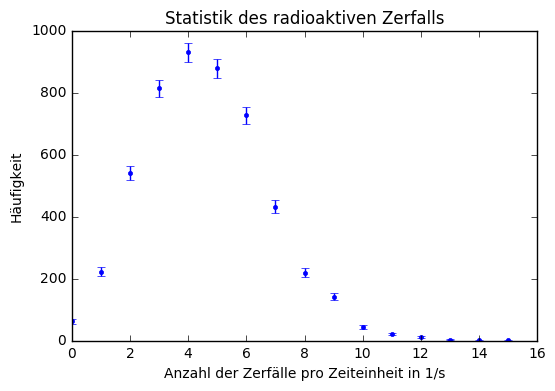

In [15]:
plt.errorbar(anzahl, haeufigkeit, fehler, fmt = '.')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit in 1/s')
plt.ylabel('Häufigkeit')
plt.title('Statistik des radioaktiven Zerfalls')
#plt.yscale('log')

In [16]:
from numpy import exp, pi, sqrt
def gaussian(x, A, mu, sig): # A: Fläche der Gauß-Funktion
    return A/sqrt(2*pi)/sig * exp(-(x - mu)**2/2/sig**2)

In [45]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(gaussian, anzahl[:-8], haeufigkeit[:-8], p0 = [5041, 4.6, 2], sigma = fehler[:-8])

In [46]:
from scipy.special import gamma
def poisson(x, A_p, mu_p):
    return A_p * exp(-mu_p) * mu_p**x / gamma(x+1)
popt_p, pcov_p = curve_fit(poisson, anzahl[:-8], haeufigkeit[:-8], p0 = [5041, 4.6], sigma = fehler[:-8])

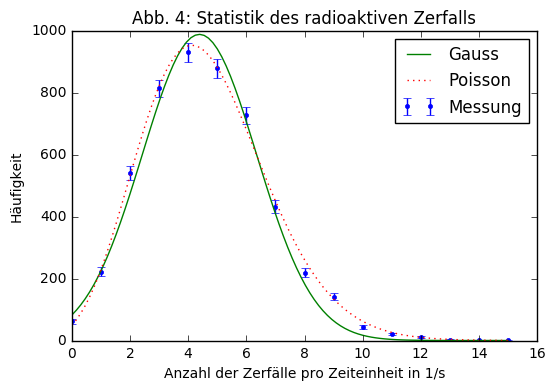

In [52]:
plt.errorbar(anzahl, haeufigkeit, fehler, fmt = '.', label = 'Messung')
plt.xlabel('Anzahl der Zerfälle pro Zeiteinheit in 1/s')
plt.ylabel('Häufigkeit')
plt.title('Abb. 4: Statistik des radioaktiven Zerfalls')
x = np.linspace(0, 15, 100)
plt.plot(x, gaussian(x, *popt), label = 'Gauss')
plt.plot(x, poisson(x, *popt_p), label = 'Poisson', linestyle = ':')
plt.legend()
plt.savefig('figures/poisson_vs_gaussian_tief1.pdf', format = 'pdf', bbox_inches = 'tight')

In [48]:
print('Gaussfit:')
print('A = ', popt[0], ', Standardfehler = ', np.sqrt(pcov[0][0]))
print('mu = ', popt[1], ', Standardfehler = ', np.sqrt(pcov[1][1]))
print('sig = ', popt[2], ', Standardfehler = ', np.sqrt(pcov[2][2]))
print('Poissonfit: ')
print('A_p = ', popt_p[0], ', Standardfehler = ', sqrt(pcov_p[0][0]))
print('mu_p = ', popt_p[1], ', Standardfehler = ', sqrt(pcov_p[1][1]))

Gaussfit:
A =  4874.29922731 , Standardfehler =  169.92389488
mu =  4.38545168587 , Standardfehler =  0.0830814309218
sig =  1.96910305219 , Standardfehler =  0.0712006721504
Poissonfit: 
A_p =  5093.14482833 , Standardfehler =  85.0920324848
mu_p =  4.63185236603 , Standardfehler =  0.0440799827651


In [49]:
# Gauss:
chi2_g = np.sum((gaussian(anzahl[:-8], *popt) - haeufigkeit[:-8])**2/fehler[:-8]**2)
dof_g = len(anzahl[:-8]) - 3 #dof: degrees of freedom, Freiheitsgrade
chi2_red_g = chi2_g / dof_g
print('chi2_g = ', chi2_g)
print('chi2_red_g = ', chi2_red_g)
#Poisson:
chi2_p = np.sum((poisson(anzahl[:-8], *popt_p) - haeufigkeit[:-8])**2/fehler[:-8]**2)
dof_p = len(anzahl[:-8]) - 2 # poisson hat nur 2 Parameter
chi2_red_p = chi2_p/dof_p
print('chi2_p = ', chi2_p)
print('chi2_red_p = ', chi2_red_p)

chi2_g =  24.9440860036
chi2_red_g =  4.98881720072
chi2_p =  7.18141157259
chi2_red_p =  1.19690192877


In [51]:
from scipy.stats import chi2
# Gauss:
prob_g = round(1 - chi2.cdf(chi2_g, dof_g), 2) * 100
# Poisson:
prob_p = round(1 - chi2.cdf(chi2_p, dof_p), 2) * 100
print('Wahrscheinlichkeit Gauss = ', prob_g, '%')
print('Wahrscheinlichkeit Poisson = ', prob_p, '%')

Wahrscheinlichkeit Gauss =  0.0 %
Wahrscheinlichkeit Poisson =  30.0 %
